<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/CFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar100

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 



In [27]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()
#(50000, 3072), (50000), (10000,32,32,3)

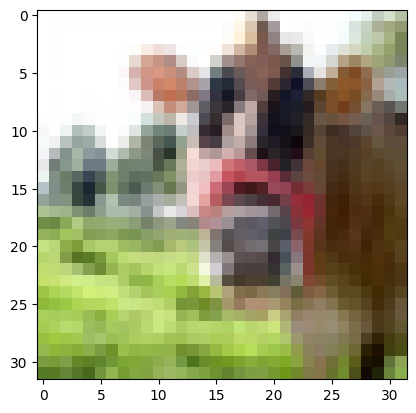

Cai nay la: [19]


In [28]:
hinh = train_images[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cai nay la:", train_labels[0])

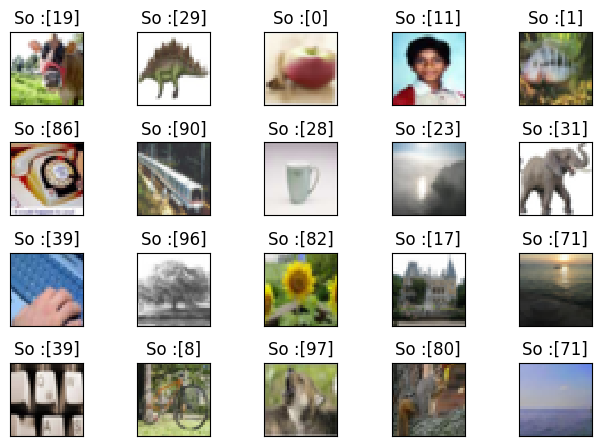

In [29]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [30]:
model = Sequential()

model.add(Dense(4096, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(2048, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4096)              12587008  
                                                                 
 dense_7 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_8 (Dense)             (None, 100)               204900    
                                                                 
Total params: 21,182,564
Trainable params: 21,182,564
Non-trainable params: 0
_________________________________________________________________


In [31]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255

In [32]:
test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255

In [33]:
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

In [34]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 30, batch_size= 1000)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
50/50 [==============================] - 3s 32ms/step - loss: 5.5427 - accuracy: 0.0275
Epoch 2/30
50/50 [==============================] - 2s 34ms/step - loss: 4.2214 - accuracy: 0.0571
Epoch 3/30
50/50 [==============================] - 2s 33ms/step - loss: 4.0258 - accuracy: 0.0820
Epoch 4/30
50/50 [==============================] - 2s 36ms/step - loss: 3.9230 - accuracy: 0.1008
Epoch 5/30
50/50 [==============================] - 2s 35ms/step - loss: 3.8121 - accuracy: 0.1170
Epoch 6/30
50/50 [==============================] - 2s 38ms/step - loss: 3.7287 - accuracy: 0.1315
Epoch 7/30
50/50 [==============================] - 2s 42ms/step - loss: 3.6574 - accuracy: 0.1427
Epoch 8/30
50/50 [==============================] - 2s 38ms/step - loss: 3.5863 - accuracy: 0.1542
Epoch 9/30
50/50 [==============================] - 2s 34ms/step - loss: 3.5209 - accuracy: 0.1680
Epoch 10/30
50/50 [==============================] - 2s 36ms/step - loss: 3.4662 - accuracy: 0.1750
Epoch 11/

In [35]:
model.save('cifar100.h5')

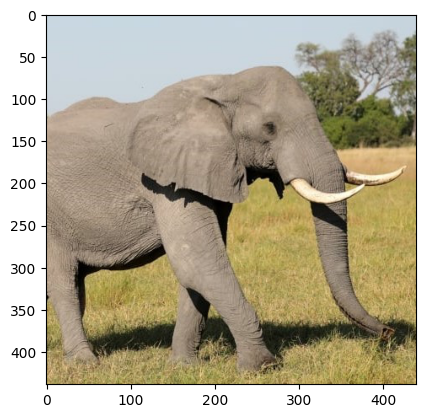

In [36]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('voi.jpg')
imshow(img)


In [37]:
img = load_img('voi.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 96ms/step


array([89])